# Factor Analysis
**(The tool you might not be using)**

Everyone knows that you can use clustering to assign labels to the observations in your dataset.

But what if you want to assign labels to the *features*? Did you know there's a tool for that? It's called **factor analysis**, and it's commonly used in psychology research. This notebook is a quick introduction to how it works.

# The dataset

The dataset I'll be using is a fun one: The **Young People Survey** by Miroslav Sabo. It examines various personality traits as well as things that Slovakian college students like and don't like.

You can find it here:

https://www.kaggle.com/miroslavsabo/young-people-survey

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import FactorAnalysis

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load the (lightly-wrangled) data
data = pd.read_csv('responses2.csv')

# These will mess up our analysis if we keep them in the dataframe
weight = data.pop('weight')
height = data.pop('height')
age = data.pop('age')

# Remove extra column(s)
for col in data.columns:
    if 'Unnamed' in col:
        del data[col]

data.head()

,music,slow_songs_or_fast_songs,dance,folk,country,classical_music,musical,pop,rock,metal_or_hardrock,...,number_of_siblings,gender,left__right_handed,education,only_child,village__town,house__block_of_flats,i_am_always_on_time,i_lie_to_others,i_spend_a_lot_of_time_online
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,1.0,female,right handed,college/bachelor degree,no,village,block of flats,5,1,3
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,female,right handed,college/bachelor degree,no,city,block of flats,3,3,3
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,2.0,female,right handed,secondary school,no,city,block of flats,1,3,3
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow,3,2,5
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,1.0,female,right handed,secondary school,no,village,house/bungalow,5,5,3


In [3]:
# Dummify the categorical variables

for i in data.columns:
    if data[i].dtype == 'O':
        dums = pd.get_dummies(data[i])
        dums.rename(columns=lambda x: str(i) + '_' + x, inplace=True)
        del data[i]
        data = pd.concat([data, dums], axis=1)

# Now that everything is numerical, let's just use the median
# for missing values.
data.fillna(data.median(), inplace=True)

data.dtypes.value_counts()

float64    131
uint8       26
int64        8
dtype: int64

# Determining the number of factors

Just like with clustering, you typically don't know how many "factors" are ideal for your data. There's going to be some trial and error here.

In psychology, it's widely accepted that there are 5 factors (or dimensions, if you prefer) of personality. So let's do a quick walkthrough with 5.

In [4]:
from sklearn.decomposition import FactorAnalysis

n_factors = 5

factor = FactorAnalysis(n_components=n_factors, random_state=1).fit(data)

# Stick it in a dataframe
factors = pd.DataFrame(factor.components_, columns=data.columns).T

# Absolute values

In a factor analysis, negative scores ("loadings") are just as important as positive ones. So it's helps to create new columns with absolute values.

In [5]:
# Loop through and create absolute correlations
for i in range(n_factors):
    factors['factor_' + str(i) + '_abs'] = np.abs(factors[i])

factors.head()

,0,1,2,3,4,factor_0_abs,factor_1_abs,factor_2_abs,factor_3_abs,factor_4_abs
music,-0.069289,0.069775,-0.079647,0.036091,0.090142,0.069289,0.069775,0.079647,0.036091,0.090142
slow_songs_or_fast_songs,0.069043,-0.057569,-0.152157,0.073751,-0.039089,0.069043,0.057569,0.152157,0.073751,0.039089
dance,-0.052491,0.050287,-0.477107,-0.178482,-0.045520,0.052491,0.050287,0.477107,0.178482,0.045520
folk,-0.051890,0.491406,0.147621,-0.133936,-0.029970,0.051890,0.491406,0.147621,0.133936,0.029970
country,0.081322,0.362444,0.116771,-0.048368,0.006489,0.081322,0.362444,0.116771,0.048368,0.006489


# ___
Now we can see how each factor clustered its features.

In [6]:
factors.sort_values('factor_0_abs', ascending=False)[[0]].head(10)

,0
i_cry_when_i_feel_down_or_things_dont_go_the_right_way,-0.790265
cars,0.635572
pc,0.613949
war,0.560328
reading,-0.550274
romantic,-0.540305
phobia_spiders,-0.522057
action,0.510107
shopping,-0.507094
gender_female,-0.488925


I'd call this factor "masculinity," for better or worse. We see the qualities of people who score high in this factor:

- They're not comfortable crying when they're upset.
- They like cars, computers, and war(?!).
- They don't like reading.
- They're not romantic.
- They're not afraid of spiders.
- They like action movies.
- They don't like shopping.
- They're... umm... not female.

In [7]:
factors.sort_values('factor_1_abs', ascending=False)[[1]].head(10)

,1
classical_music,0.718513
opera,0.647939
art_exhibitions,0.647370
musical_instruments,0.634725
swing_jazz,0.627336
theatre,0.606226
reading,0.587846
religion,0.553330
history,0.525101
medicine,0.521877


This happens to be a personality trait we call [**openness to experience**](https://en.wikipedia.org/wiki/Openness_to_experience)! People who score high in this trait like art, philosophy, culture, learning new things, and questioning the status quo. People who score low in this trait are conventional and old-fashioned.

In [8]:
factors.sort_values('factor_2_abs', ascending=False)[[2]].head(10)

,2
i_spend_a_lot_of_money_on_my_appearance,-0.712287
i_enjoy_going_to_large_shopping_centres,-0.683669
shopping,-0.680718
hiphop_rap,-0.637750
i_prefer_branded_clothing_to_non_branded,-0.573938
i_have_lots_of_friends,-0.505963
adrenaline_sports,-0.502618
active_sport,-0.498756
i_am_always_full_of_life_and_energy,-0.490226
dance,-0.477107


It might not be obvious, but this is actually measuring how introverted you are! A perhaps little-known fact about extraverts is that they like to go shopping more than introverts do.

This, combined with the fact that this factor is measuring how many friends you have, how much attention you like getting, and how energetic you are, makes me confident that our factor analysis has discovered the personality scale of extraversion/introversion.

In [9]:
factors.sort_values('factor_3_abs', ascending=False)[[3]].head(10)

,3
phobia_dangerous_dogs,-0.549490
phobia_snakes,-0.535865
phobia_rats,-0.466462
i_have_to_be_well_prepared_before_public_speaking,-0.442625
i_worry_about_my_health,-0.429908
i_prefer_big_dangerous_dogs_to_smaller_calmer_dogs,0.421149
i_take_my_time_to_make_decisions,-0.394376
metal_or_hardrock,0.382017
adrenaline_sports,0.382013
phobia_flying,-0.380886


Again, our factor analysis has uncovered a well-known personality trait: [**neuroticism**](https://en.wikipedia.org/wiki/Neuroticism), which is characterized by worrying, depression, shyness, and other negative emotions. More accurately, we discovered the inverse of neuroticism: emotional stability.

People who score high on this factor are not afraid of:
- Dogs
- Snakes
- Rats
- Public speaking
- Their health
- Extreme sports
- Flying

Surprisingly, they're not afraid of heavy metal either.

In [10]:
factors.sort_values('factor_4_abs', ascending=False)[[4]].head(10)

,4
i_wish_i_could_change_the_past_because_of_the_things_i_have_done,0.441551
i_feel_lonely_in_life,0.421935
i_am_always_on_time,-0.415737
phobia_aging,0.390074
alternative,0.382044
i_find_it_very_difficult_to_get_up_in_the_morning,0.381576
i_have_damaged_things_in_the_past_when_angry,0.369180
i_can_fall_for_someone_very_quickly_and_then_completely_lose_interest,0.323242
i_am_always_full_of_life_and_energy,-0.320402
i_spend_a_lot_of_money_on_my_appearance,0.319880


Notice these loadings aren't as high as, say, factors 1 or 2. This, combined with the fact we seem to be seeing questions that measure **neuroticism** again, means that 5 factors probably isn't ideal for this dataset. (This is probably because it discovered masculinity as a personality trait, when it's really more of a gender/cultural phenomenon.)

Now let's look at how we can determine the right number of factors...

# How many factors should we use?

I know of two ways to do this.

This first method is based more on logic and intuition than any rigorous mathematical formula.

In [11]:
# We're going to test a range of factors from 2 to 20.
for i in range(2,20):
    
    # Fit to "i" factors
    factor = FactorAnalysis(n_components=i, random_state=1).fit(data)
    
    # Put it in a dataframe
    factors = pd.DataFrame(factor.components_,columns=data.columns)
    
    # See below; these next 2 lines are the tricky part.
    factors = np.abs(factors) # (1)
    print(i, factors.max().std()) # (2, 3)

2 0.18338940507401466
3 0.1861102601907512
4 0.18036507597042736
5 0.1754004243311831
6 0.17229366846403377
7 0.17081622266627164
8 0.17535749296503964
9 0.1734901975094079
10 0.19903759312187663
11 0.19880251137431298
12 0.19798946895771272
13 0.19453267242225716
14 0.19236133964187488
15 0.1931380975002367
16 0.19208477774110586
17 0.19368949876619157
18 0.1924418911556603
19 0.18980735703996554


The idea is that we want to look at:
    
1. The absolute values, since negative numbers are just as relevant.
2. The maximum value for each factor -- `.max()` -- to see how strong it is overall.
3. How similar the max scores are: `.std()`. If some max scores are high and others are low, then the factors aren't effectively segregating the features.

From this, it would appear that the ideal number of factors is **7** (which seems reasonable). 

___

Method 2 uses some guidelines developed by other statisticians.

Guadagnoli & Velicer (1988) consider a factor to be reliable if it has 4 or more loadings of at least 0.6, regardless of the sample size. Meanwhile, MacCallum et al. (1999, 2001) assert that I could go as low as 0.3 with the current sample size I have.

Since 0.6 doesn't give good results with this dataset, I'll settle on 0.4 instead. The code below starts at 20 factors, and counts how many items would have a loading of 0.4 or higher. Then it iterates downward until it finds the maximum number of factors that gives us the desired results.

In [12]:
for n in range(20,2,-1):
    data = data.select_dtypes(include=[np.number])
    factor = FactorAnalysis(n_components=n, random_state=1).fit(data)

    # Stick it in a dataframe
    factors = pd.DataFrame(factor.components_, columns=data.columns).T

    col_names = []
    for i in range(n):
        # We'll need non-zero factor values for our next
        # step, so we'll start counting at 1
        col_names.append('factor_' + str(i + 1))

    factors.columns = col_names

    data_new = pd.DataFrame()
    items = []
    for i in col_names:
        for k, v in zip(factors[i].index, factors[i]):
            if np.abs(v) > 0.3: # factor loading
                items.append((i,k,v))
    
    # This effectively counts the number of items in
    # each factor. 4 or more should make the factor reliable. 
    items = pd.DataFrame(items)
    group = items.groupby(0).count()
    if len(group[group >= 4].dropna()) == n:
        print(n, 'works!')
        break

5 works!


It turns out this method still likes 5 factors. But since we've done that already, let's analyze the data with **7 factors**.

In [13]:
n_comp = 7

factor = FactorAnalysis(n_components=n_comp, random_state=1).fit(data)

# Stick it in a dataframe
factors = pd.DataFrame(factor.components_,columns=data.columns).T

col_names = []
for i in range(n_comp):
    # We'll need non-zero factor values for our next
    # step, so we'll start counting at 1
    col_names.append('factor_' + str(i + 1))
    
factors.columns = col_names

data_new = pd.DataFrame()
items = []
for i in col_names:
    for k, v in zip(factors[i].index, factors[i]):
        if np.abs(v) > .4:
            items.append((i,k,v))

Now we have an array of questions, their corresponding factors, and their loadings. It's pretty simple to iterate over them and separate the positive and negative loadings.

In [14]:
from collections import defaultdict

factor_dict = defaultdict(list)

for i,k,v in items:
    if v > 0:
        factor_dict['+ ' + i].append(k)
    elif v < 0:
        factor_dict['- ' + i].append(k)

In [15]:
def print_factor(n):
    print('Factor {}'.format(str(n)))
    print('Positive:')
    print(factor_dict['+ factor_' + str(n)])
    print('\nNegative:')
    print(factor_dict['- factor_' + str(n)])
    
print_factor(1)

Factor 1
Positive:
['village__town_village']

Negative:
['village__town_city']


**Where they grew up**.

In [16]:
print_factor(2)

Factor 2
Positive:
['scifi', 'war', 'western', 'action', 'pc', 'cars', 'science_and_technology', 'gender_male']

Negative:
['romantic', 'reading', 'dancing', 'shopping', 'theatre', 'phobia_darkness', 'phobia_spiders', 'i_cry_when_i_feel_down_or_things_dont_go_the_right_way', 'gender_female']


**Masculinity**.

In [17]:
print_factor(3)

Factor 3
Positive:
['folk', 'classical_music', 'musical', 'swing_jazz', 'rock_n_roll', 'alternative', 'latino', 'opera', 'documentary', 'history', 'psychology', 'physics', 'biology', 'reading', 'geography', 'medicine', 'art_exhibitions', 'religion', 'countryside_outdoors', 'dancing', 'musical_instruments', 'writing', 'science_and_technology', 'theatre', 'i_often_study_or_work_even_in_my_spare_time', 'i_always_try_to_vote_in_elections', 'i_have_many_different_hobbies_and_interests']

Negative:
[]


[**Openness to experience**](https://en.wikipedia.org/wiki/Openness_to_experience).

In [18]:
print_factor(4)

Factor 4
Positive:
['metal_or_hardrock']

Negative:
['dance', 'hiphop_rap', 'cars', 'dancing', 'active_sport', 'celebrities', 'shopping', 'adrenaline_sports', 'i_have_lots_of_friends', 'i_enjoy_meeting_new_people', 'i_always_make_sure_i_connect_with_the_right_people', 'i_am_always_full_of_life_and_energy', 'i_enjoy_going_to_large_shopping_centres', 'i_prefer_branded_clothing_to_non_branded', 'i_spend_a_lot_of_money_on_partying_and_socializing', 'i_spend_a_lot_of_money_on_my_appearance', 'i_spend_a_lot_of_money_on_gadgets']


**Introversion**. (Interesting how heavy metal had such a strong loading.)

In [19]:
print_factor(5)

Factor 5
Positive:
['adrenaline_sports', 'i_prefer_big_dangerous_dogs_to_smaller_calmer_dogs']

Negative:
['phobia_snakes', 'phobia_rats', 'phobia_dangerous_dogs', 'i_always_make_a_list_so_i_dont_forget_anything', 'i_take_my_time_to_make_decisions', 'i_worry_about_my_health', 'i_have_to_be_well_prepared_before_public_speaking']


**Emotional stability**.

In [20]:
print_factor(6)

Factor 6
Positive:
['alternative', 'i_wish_i_could_change_the_past_because_of_the_things_i_have_done', 'i_find_it_very_difficult_to_get_up_in_the_morning']

Negative:
['i_am_always_on_time']


I would call this **impulsiveness**, which is the opposite of [conscientiousness](https://en.wikipedia.org/wiki/Conscientiousness).

In [21]:
print_factor(7)

Factor 7
Positive:
[]

Negative:
['pc']


Hmmm... it's how much you like **computers**.

Now we can see why 7 factors isn't quite perfect either. I'll exercise my own judgment and do the remaining analysis with **6 factors**.

# Clustering the questions

In [22]:
n_comp = 6

factor = FactorAnalysis(n_components=n_comp, random_state=1).fit(data)

# Stick it in a dataframe
factors = pd.DataFrame(factor.components_,columns=data.columns).T

col_names = []
for i in range(n_comp):
    col_names.append('factor_' + str(i + 1))
factors.columns = col_names

items = []
for i in col_names:
    for k, v in zip(factors[i].index, factors[i]):
        if np.abs(v) > .4:
            items.append((i,k,v))
            
factor_dict = defaultdict(list)

for i,k,v in items:
    if v > 0:
        factor_dict['+ ' + i].append(k)
    elif v < 0:
        factor_dict['- ' + i].append(k)

In [23]:
# We have to make sure each item is scored along the same scale
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
cols = data.columns
data = pd.DataFrame(mms.fit_transform(data))
data.columns = cols

factors_plus_minus = pd.DataFrame()
for k, v in factor_dict.items():
    factors_plus_minus[k] = data[v].sum(axis=1)
    
# No negative items for 3; we'll add it manually
factors_plus_minus['- factor_3'] = 0

factors_plus_minus.head()

,- factor_1,+ factor_1,- factor_2,+ factor_2,+ factor_3,- factor_4,+ factor_4,+ factor_5,- factor_5,+ factor_6,- factor_6,- factor_3
0,0.0,1.0,3.75,2.25,9.50,8.50,0.00,0.75,4.50,0.25,1.0,0
1,1.0,0.0,3.00,3.00,9.00,6.75,0.75,1.25,2.50,2.50,0.5,0
2,1.0,0.0,5.75,1.75,17.75,8.75,0.50,1.50,2.00,2.75,0.0,0
3,1.0,0.0,4.75,2.00,12.75,5.75,0.00,0.00,5.75,2.00,0.5,0
4,0.0,1.0,3.25,3.00,12.00,8.50,0.00,0.75,3.25,1.75,1.0,0


In [24]:
# Let's scale it again, because some factors have more items than others
cols = factors_plus_minus.columns
factors_plus_minus = pd.DataFrame(mms.fit_transform(factors_plus_minus))
factors_plus_minus.columns = cols

In [25]:
data_factors = pd.DataFrame()

for i in range(1, n_comp+1):
    plus_components = len(factor_dict['+ factor_' + str(i)])
    minus_components = len(factor_dict['- factor_' + str(i)])
    total_components = plus_components + minus_components
    plus_pct = plus_components/total_components
    minus_pct = minus_components/total_components
    data_factors['factor_' + str(i)] =\
        (plus_pct * factors_plus_minus['+ factor_' + str(i)]) +\
        (minus_pct * (1 - factors_plus_minus['- factor_' + str(i)]))

And now we have the 6 factors properly measured in a dataframe! Let's fix the column names and then take a look at the final product.

In [26]:
data_factors.columns = ['born_in_village', 'masculinity', 'openness', 'introversion',
                        'emotional_stability', 'impulsiveness']

data_factors.head()

,born_in_village,masculinity,openness,introversion,emotional_stability,impulsiveness
0,1.0,0.428201,0.341463,0.472222,0.361111,0.0625
1,0.0,0.519031,0.317073,0.627874,0.638889,0.7500
2,0.0,0.274221,0.743902,0.483716,0.722222,0.9375
3,0.0,0.351211,0.500000,0.651341,0.138889,0.6250
4,1.0,0.503460,0.463415,0.472222,0.500000,0.4375


If we replace masculinity with [agreeableness](https://en.wikipedia.org/wiki/Agreeableness), then we have indeed discovered the [big five personality traits](https://en.wikipedia.org/wiki/Big_Five_personality_traits) proposed by psychologists. Interestingly, it is in fact agreeableness that tends to have the biggest difference between genders (women tend to be more agreeable).

It's fascinating for me to reproduce such a fundamental psychological finding from scratch!

I typically *don't* consider factor analysis to be good for dimensionality reduction, because principal component analysis can achieve similar results with much less code:

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(data)

data_pca = pd.DataFrame(pca.fit_transform(data))

data_pca.head()

,0,1,2,3,4,5
0,-0.291765,0.164556,-0.359605,-0.045645,-0.813542,0.472236
1,0.625620,-0.986896,0.443533,1.081974,0.338392,0.226812
2,-0.674904,-0.040445,1.844350,0.392315,1.153786,0.420346
3,-0.452809,-0.699606,-0.524305,0.888998,0.570622,0.949301
4,-0.429749,0.987838,-1.013416,0.131897,-0.574381,0.176093


We could even dig in to this dataframe and see how each component correlates with our original features. In fact, let's do that real quick just for fun:

In [28]:
# Because I love to sort by absolute values...
component_4 = pd.DataFrame(data.corrwith(data_pca[4]))
component_4['absol'] = np.abs(component_4[0])
component_4.sort_values('absol', ascending=False)[0].head(10)

i_am_always_on_time                                                          -0.769107
punctuality_categorical_i am often running late                               0.688494
punctuality_categorical_i am always on time                                  -0.647130
alcohol_drink a lot                                                           0.425574
alcohol_social drinker                                                       -0.306484
i_try_to_do_tasks_as_soon_as_possible_and_not_leave_them_until_last_minute   -0.299157
i_save_all_the_money_i_can                                                   -0.288075
i_spend_a_lot_of_money_on_partying_and_socializing                            0.287648
i_find_it_very_difficult_to_get_up_in_the_morning                             0.265920
smoking_current smoker                                                        0.260198
Name: 0, dtype: float64

You can see that principal component 4 has discovered impulsiveness as well! So what's the point of factor analysis?

I like factor analysis because it provides additional insight into your features; it allows you to see which ones are effectively measuring the same latent variables, and then gives you a mathematically rigorous method for combining them to improve the reliability of your measurements. This is quite valuable when it comes to measuring something that's inherently unpredictable like human behavior.

Let's look at one last example before wrapping this project up. Let's say we want to measure how extraverted and social someone is. Perhaps we start by trying this:

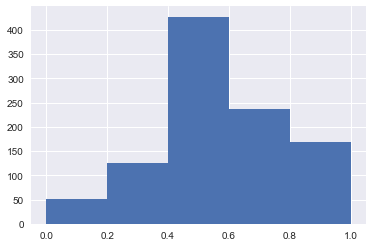

In [29]:
data['i_have_lots_of_friends'].hist(bins=5)

This data is pretty low-resolution, wouldn't you say? Everyone had to rate how much they agreed with that statement from 1-5.

Compare that to the "introversion" factor we discovered earlier:

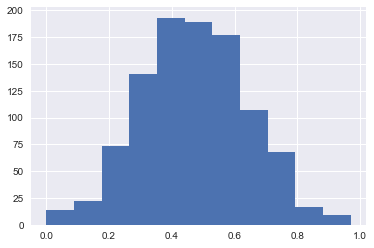

In [30]:
data_factors['introversion'].hist(bins=11)

Suddenly we have a much clearer idea of how extraverted someone is, rather than relying on just one question. And, to reiterate an important point, this vastly improves the reliability of your data.

That wraps up my introduction to factor analysis. Hope you found it useful!